In [61]:
#Importing Libraries Needed for Regression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as stats
from scipy.stats import f_oneway
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [62]:
#Reading the Churn File
churn_data = pd.read_csv('A2.csv')

In [63]:
#Looking at the DataFrame
churn_data.head(5)

,Unnamed: 0,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Churn,Geography,CreditScore,Surname,EstimatedSalary,MonthlyCharges,customerID,Dependents,PaymentMethod,Charge
0,0,Female,0.0,Yes,72.0,Yes,No,Fiber optic,Yes,Yes,...,No,Germany,602.0,Klein,45038.29,108.30,6519-ZHPXP,Yes,Bank transfer (automatic),108.30
1,1,Male,0.0,Yes,30.0,Yes,Yes,DSL,No,No,...,No,Germany,776.0,Lung,89893.60,49.90,1958-RNRKS,No,Electronic check,49.90
2,2,Male,0.0,Yes,49.0,No,No phone service,DSL,Yes,No,...,No,Germany,709.0,Lucciano,11.58,39.20,7989-AWGEH,Yes,Electronic check,39.20
3,3,Female,1.0,Yes,25.0,Yes,Yes,DSL,Yes,No,...,No,France,788.0,O'Brien,116978.19,69.50,6575-SUVOI,No,Credit card (automatic),69.50
4,4,Female,1.0,Yes,72.0,Yes,Yes,Fiber optic,Yes,Yes,...,No,Germany,733.0,Medvedeva,177994.81,114.65,1779-PWPMG,No,Bank transfer (automatic),114.65


In [64]:
#Looking at the DataFrame Info
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8000 non-null   int64  
 1   gender            7938 non-null   object 
 2   SeniorCitizen     7954 non-null   float64
 3   Partner           7952 non-null   object 
 4   tenure            7938 non-null   float64
 5   PhoneService      7947 non-null   object 
 6   MultipleLines     7933 non-null   object 
 7   InternetService   7944 non-null   object 
 8   OnlineSecurity    7941 non-null   object 
 9   OnlineBackup      7960 non-null   object 
 10  DeviceProtection  7953 non-null   object 
 11  TechSupport       7954 non-null   object 
 12  StreamingTV       7950 non-null   object 
 13  StreamingMovies   7947 non-null   object 
 14  Contract          7952 non-null   object 
 15  PaperlessBilling  7952 non-null   object 
 16  TotalCharges      7961 non-null   object 


In [65]:
#Modifying the DataFrame by Selecting the Columns needed. 
#The Monthly Charge Column was Discarded as the Info is already in "Charge"
churn_data = churn_data[['gender', 
                         'SeniorCitizen', 
                         'Partner', 
                         'tenure', 
                         'PhoneService', 
                         'MultipleLines', 
                         'OnlineSecurity', 
                         'OnlineBackup', 
                         'DeviceProtection', 
                         'TechSupport', 
                         'StreamingTV', 
                         'StreamingMovies', 
                         'Contract', 
                         'PaperlessBilling', 
                         'TotalCharges', 
                         'Geography',
                         'CreditScore',  
                         'EstimatedSalary', 
                         'Dependents', 
                         'PaymentMethod', 
                         'Charge',
                         'Churn']]
churn_data.head(5)

,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract,PaperlessBilling,TotalCharges,Geography,CreditScore,EstimatedSalary,Dependents,PaymentMethod,Charge,Churn
0,Female,0.0,Yes,72.0,Yes,No,Yes,Yes,Yes,Yes,...,Two year,Yes,7679.65,Germany,602.0,45038.29,Yes,Bank transfer (automatic),108.30,No
1,Male,0.0,Yes,30.0,Yes,Yes,No,No,No,No,...,Month-to-month,No,1441.95,Germany,776.0,89893.60,No,Electronic check,49.90,No
2,Male,0.0,Yes,49.0,No,No phone service,Yes,No,No,No,...,Month-to-month,Yes,1838.15,Germany,709.0,11.58,Yes,Electronic check,39.20,No
3,Female,1.0,Yes,25.0,Yes,Yes,Yes,No,No,Yes,...,Month-to-month,Yes,1752.65,France,788.0,116978.19,No,Credit card (automatic),69.50,No
4,Female,1.0,Yes,72.0,Yes,Yes,Yes,Yes,Yes,Yes,...,Two year,Yes,8333.95,Germany,733.0,177994.81,No,Bank transfer (automatic),114.65,No


In [66]:
#Identifying Columns with Missing Values
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7938 non-null   object 
 1   SeniorCitizen     7954 non-null   float64
 2   Partner           7952 non-null   object 
 3   tenure            7938 non-null   float64
 4   PhoneService      7947 non-null   object 
 5   MultipleLines     7933 non-null   object 
 6   OnlineSecurity    7941 non-null   object 
 7   OnlineBackup      7960 non-null   object 
 8   DeviceProtection  7953 non-null   object 
 9   TechSupport       7954 non-null   object 
 10  StreamingTV       7950 non-null   object 
 11  StreamingMovies   7947 non-null   object 
 12  Contract          7952 non-null   object 
 13  PaperlessBilling  7952 non-null   object 
 14  TotalCharges      7961 non-null   object 
 15  Geography         7948 non-null   object 
 16  CreditScore       7938 non-null   float64


In [67]:
#Dropping the NA's on the Columns were there are Missing Values
churn_data = churn_data.dropna(subset=['gender'])
churn_data = churn_data.dropna(subset=['SeniorCitizen'])
churn_data = churn_data.dropna(subset=['Partner'])
churn_data = churn_data.dropna(subset=['tenure'])
churn_data = churn_data.dropna(subset=['PhoneService'])
churn_data = churn_data.dropna(subset=['MultipleLines'])
churn_data = churn_data.dropna(subset=['OnlineSecurity'])
churn_data = churn_data.dropna(subset=['OnlineBackup'])
churn_data = churn_data.dropna(subset=['DeviceProtection'])
churn_data = churn_data.dropna(subset=['TechSupport'])
churn_data = churn_data.dropna(subset=['StreamingTV'])
churn_data = churn_data.dropna(subset=['StreamingMovies'])
churn_data = churn_data.dropna(subset=['PaperlessBilling'])
churn_data = churn_data.dropna(subset=['Churn'])

#Identifying which Columns have Missing Values to be filled 
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7291 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7291 non-null   object 
 1   SeniorCitizen     7291 non-null   float64
 2   Partner           7291 non-null   object 
 3   tenure            7291 non-null   float64
 4   PhoneService      7291 non-null   object 
 5   MultipleLines     7291 non-null   object 
 6   OnlineSecurity    7291 non-null   object 
 7   OnlineBackup      7291 non-null   object 
 8   DeviceProtection  7291 non-null   object 
 9   TechSupport       7291 non-null   object 
 10  StreamingTV       7291 non-null   object 
 11  StreamingMovies   7291 non-null   object 
 12  Contract          7245 non-null   object 
 13  PaperlessBilling  7291 non-null   object 
 14  TotalCharges      7257 non-null   object 
 15  Geography         7240 non-null   object 
 16  CreditScore       7235 non-null   float64


In [68]:
#Converting the TotalCharges into a Float Type
#Replace Any Blank Cell or that has a Space on it with a 0
churn_data.TotalCharges = churn_data.TotalCharges.replace(' ', '0')
churn_data.TotalCharges = churn_data.TotalCharges.astype('float')

#Check if there are any Outliers in the Data
churn_data.describe()

#Fill the Missing Values with the Median
churn_data.TotalCharges = churn_data.TotalCharges.fillna(churn_data.TotalCharges.median())


In [69]:
#Identifying which is the "Geography" that repeats itself the most to fill Missing Values
churn_data.groupby("Geography").count()

#Replacing Contract Missing values with "France"
churn_data['Geography'] = (churn_data['Geography'].fillna('France'))

In [70]:
#Replacing Missing Values of CreditScore with the Median
churn_data['CreditScore'] = (churn_data['CreditScore'].fillna(churn_data['CreditScore'].median()))
#Replacing Missing Values of EstimatedSalary with the Median
churn_data['EstimatedSalary'] = (churn_data['EstimatedSalary'].fillna(churn_data['EstimatedSalary'].median()))

In [71]:
#Replacing Values on Categorical Columns to only Include No as a Negative Answer
churn_data['MultipleLines'] = churn_data['MultipleLines'].replace('No phone service', 'No')

churn_data['OnlineSecurity'] = churn_data['OnlineSecurity'].replace('No internet service', 'No')

churn_data['OnlineBackup'] = churn_data['OnlineBackup'].replace('No internet service', 'No')

churn_data['DeviceProtection'] = churn_data['DeviceProtection'].replace('No internet service', 'No')

churn_data['TechSupport'] = churn_data['TechSupport'].replace('No internet service', 'No')

churn_data['StreamingTV'] = churn_data['StreamingTV'].replace('No internet service', 'No')

churn_data['StreamingMovies'] = churn_data['StreamingMovies'].replace('No internet service', 'No')


In [72]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7291 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7291 non-null   object 
 1   SeniorCitizen     7291 non-null   float64
 2   Partner           7291 non-null   object 
 3   tenure            7291 non-null   float64
 4   PhoneService      7291 non-null   object 
 5   MultipleLines     7291 non-null   object 
 6   OnlineSecurity    7291 non-null   object 
 7   OnlineBackup      7291 non-null   object 
 8   DeviceProtection  7291 non-null   object 
 9   TechSupport       7291 non-null   object 
 10  StreamingTV       7291 non-null   object 
 11  StreamingMovies   7291 non-null   object 
 12  Contract          7245 non-null   object 
 13  PaperlessBilling  7291 non-null   object 
 14  TotalCharges      7291 non-null   float64
 15  Geography         7291 non-null   object 
 16  CreditScore       7291 non-null   float64


In [73]:
#Optimizing the Code and Response Time and Changing Categorical Values to Boolean
churn_data['isMale'] = churn_data.gender.map({'Male': True,
                                            'Female': False})
churn_data = churn_data.drop('gender', axis=1)
    
churn_data.SeniorCitizen = churn_data.SeniorCitizen.map({0.0: False,
                                                      1.0: True})

churn_data.Partner = churn_data.Partner.map({'Yes': True,
                                           'No': False})

churn_data.tenure = churn_data.tenure.astype('int16')

churn_data.PhoneService = churn_data.PhoneService.map({'Yes': True,
                                                     'No': False})

churn_data.MultipleLines = churn_data.MultipleLines.map({'Yes': True,
                                                       'No': False})

churn_data.OnlineSecurity = churn_data.OnlineSecurity.map({'Yes': True,
                                                         'No': False})

churn_data.OnlineBackup = churn_data.OnlineBackup.map({'Yes': True,
                                                     'No': False})

churn_data.DeviceProtection = churn_data.DeviceProtection.map({'Yes': True,
                                                             'No': False})

churn_data.TechSupport = churn_data.TechSupport.map({'Yes': True,
                                                   'No': False})

churn_data.StreamingTV = churn_data.StreamingTV.map({'Yes': True,
                                                   'No': False})

churn_data.StreamingMovies = churn_data.StreamingMovies.map({'Yes': True,
                                                           'No': False})

churn_data.Contract = churn_data.Contract.astype('category')

churn_data.PaperlessBilling = churn_data.PaperlessBilling.map({'Yes': True,
                                                             'No': False})

churn_data.TotalCharges = churn_data.TotalCharges.astype('float32')

churn_data.Geography = churn_data.Geography.astype('category')

churn_data.CreditScore = churn_data.CreditScore.astype('int32')

churn_data.EstimatedSalary = churn_data.EstimatedSalary.astype('float32')

churn_data.Dependents = churn_data.Dependents.map({'Yes': True,
                                                 'No': False})

churn_data.PaymentMethod = churn_data.PaymentMethod.astype('category')

churn_data.Charge = churn_data.Charge.astype('float32')

churn_data.Churn = churn_data.Churn.map({'Yes': True,
                                       'No': False})



churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7291 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SeniorCitizen     7291 non-null   bool    
 1   Partner           7291 non-null   bool    
 2   tenure            7291 non-null   int16   
 3   PhoneService      7291 non-null   bool    
 4   MultipleLines     7291 non-null   bool    
 5   OnlineSecurity    7291 non-null   bool    
 6   OnlineBackup      7291 non-null   bool    
 7   DeviceProtection  7291 non-null   bool    
 8   TechSupport       7291 non-null   bool    
 9   StreamingTV       7291 non-null   bool    
 10  StreamingMovies   7291 non-null   bool    
 11  Contract          7245 non-null   category
 12  PaperlessBilling  7291 non-null   bool    
 13  TotalCharges      7291 non-null   float32 
 14  Geography         7291 non-null   category
 15  CreditScore       7291 non-null   int32   
 16  EstimatedSalary   7291 n

In [74]:
churn_data.head(5)

,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaperlessBilling,TotalCharges,Geography,CreditScore,EstimatedSalary,Dependents,PaymentMethod,Charge,Churn,isMale
0,False,True,72,True,False,True,True,True,True,True,...,True,7679.649902,Germany,602,45038.289062,True,Bank transfer (automatic),108.300003,False,False
1,False,True,30,True,True,False,False,False,False,False,...,False,1441.949951,Germany,776,89893.601562,False,Electronic check,49.900002,False,True
2,False,True,49,False,False,True,False,False,False,False,...,True,1838.150024,Germany,709,11.580000,True,Electronic check,39.200001,False,True
3,True,True,25,True,True,True,False,False,True,True,...,True,1752.650024,France,788,116978.187500,False,Credit card (automatic),69.500000,False,False
4,True,True,72,True,True,True,True,True,True,True,...,True,8333.950195,Germany,733,177994.812500,False,Bank transfer (automatic),114.650002,False,False


In [82]:
#Selecing the Variables, Eliminating the Categorical Ones, just using Booleans
x_var = ['SeniorCitizen', 
        'Partner', 
        'tenure', 
        'PhoneService', 
        'MultipleLines', 
        'OnlineSecurity', 
        'OnlineBackup', 
        'DeviceProtection', 
        'TechSupport', 
        'StreamingTV', 
        'StreamingMovies', 
        'PaperlessBilling', 
        'TotalCharges', 
        'CreditScore',  
        'EstimatedSalary', 
        'Dependents', 
        'Charge',
        'isMale']

In [83]:
y_data = churn_data.loc[ : , 'Churn']
x_data = churn_data.loc[ : , x_var]

In [84]:
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables 
            y_data, # y-variable  
            test_size    = 0.4,
            random_state = 200)

In [85]:
#Running LinearRegrssion Model
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)

y_predicted = model_linear.predict(x_test)

#Model evaluation
rmse = mean_squared_error(y_test, y_predicted).round(2)
r2 = r2_score(y_test, y_predicted).round(2)

#Print Results
print('Slope:' ,model_linear.coef_.round(decimals = 2))
print('Intercept:', model_linear.intercept_.round(decimals = 2))
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 0.07 -0.01 -0.   -0.22  0.03 -0.09 -0.07 -0.05 -0.12 -0.03 -0.01  0.05
 -0.   -0.    0.   -0.02  0.01 -0.01]
Intercept: 0.23
Root mean squared error:  0.14
R2 score:  0.26


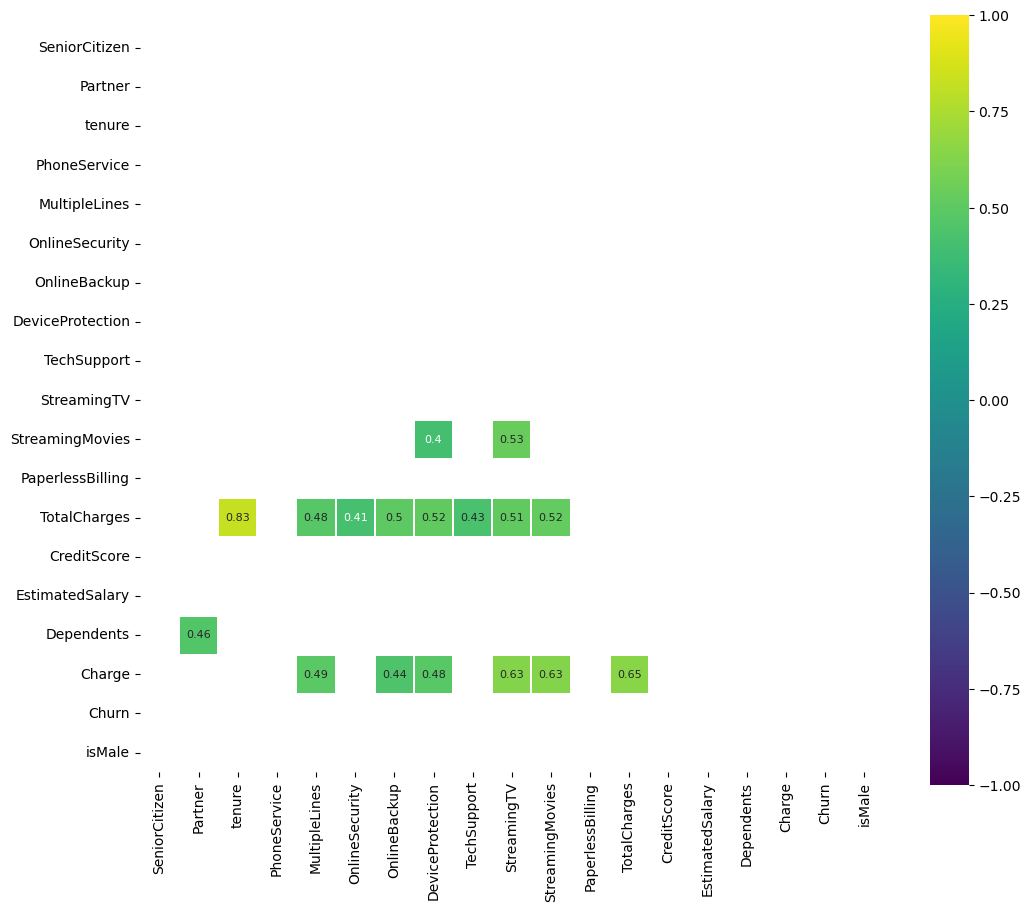

In [86]:
#Analysing the Correlation to Improve our Model
corr = churn_data.corr()
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Only show the strong correlations
sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)],
            cmap='viridis',
            mask=mask,
            vmax=1.0,
            vmin=-1.0,
            linewidths=0.1,
            annot=True,
            annot_kws={"size": 8},
            square=True);

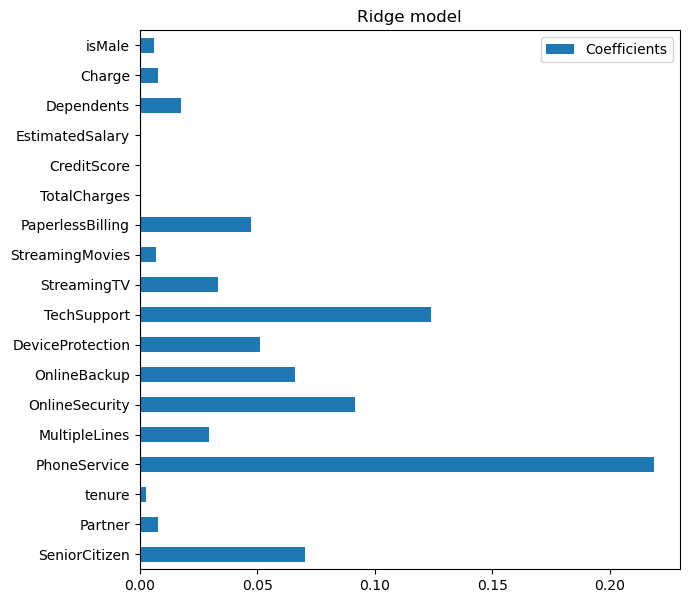

In [87]:
coefs = pd.DataFrame(
   np.abs(model_linear.coef_),
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [89]:
#Predict the Churn for the Next Client
y_predicted = model_linear.predict(pd.DataFrame({'SeniorCitizen': [False], #is not a Senior
                                                 'Partner': [True], #is not Single
                                                 'tenure': [40], #40 years old
                                                 'PhoneService': [True], #Has All the Services with us
                                                 'MultipleLines': [True],
                                                 'OnlineSecurity': [True],
                                                 'OnlineBackup': [True],
                                                 'DeviceProtection': [True],
                                                 'TechSupport': [True],
                                                 'StreamingTV': [True],
                                                 'StreamingMovies': [True],
                                                 'PaperlessBilling': [True],
                                                 'TotalCharges': [1000],
                                                 'CreditScore': [625],
                                                 'EstimatedSalary': [50000],
                                                 'Dependents': [True],
                                                 'Charge': [65], #The average Charge from the Data
                                                 'isMale': [True]}))

print("The Churn Prediction: ", y_predicted.round(2))


The Churn Prediction:  [0.02]


In [22]:
#Predict the Churn for the Next Client that has No Dependants
y_predicted = model_linear.predict(pd.DataFrame({'SeniorCitizen': [False], #is not a Senior
                                                 'Partner': [True], #is not Single
                                                 'tenure': [40], #40 years old
                                                 'PhoneService': [True], #Has All the Services with us
                                                 'MultipleLines': [True],
                                                 'OnlineSecurity': [True],
                                                 'OnlineBackup': [True],
                                                 'DeviceProtection': [True],
                                                 'TechSupport': [True],
                                                 'StreamingTV': [True],
                                                 'StreamingMovies': [True],
                                                 'PaperlessBilling': [True],
                                                 'TotalCharges': [1000],
                                                 'CreditScore': [625],
                                                 'EstimatedSalary': [50000],
                                                 'Dependents': [False],
                                                 'Charge': [65], #The average Charge from the Data
                                                 'isMale': [True]}))

print("The Churn Prediction: ", y_predicted.round(2))

The Churn Prediction:  [0.04]


In [90]:
#Running Logistic Regression Model
model_logistic = LogisticRegression()
model_logistic.fit(x_train, y_train)

y_predicted = model_logistic.predict(x_test)

predicted_positive, predicted_negative = confusion_matrix(y_test, y_predicted)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

       False       0.82      0.90      0.86      2137
        True       0.63      0.45      0.52       780

    accuracy                           0.78      2917
   macro avg       0.72      0.67      0.69      2917
weighted avg       0.77      0.78      0.77      2917

